# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Whoop Fitness Dataset](https://www.kaggle.com/datasets/likithagedipudi/whoop-fitness-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/whoop-fitness-dataset/whoop_fitness_dataset_100k.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/whoop-fitness-dataset/whoop_fitness_dataset_100k.csv')

# Preprocessing

## Remove Unnecessory features

In [3]:
df = df.drop(columns=[
    'user_id','date','day_of_week','primary_sport','fitness_level',
    'workout_time_of_day','activity_strain','hr_zone_1_min',
    'hr_zone_2_min','hr_zone_3_min','hr_zone_4_min','hr_zone_5_min',
    'activity_duration_min','avg_heart_rate','max_heart_rate','activity_calories'
])

## Frist five row

In [4]:
df.head()

,age,gender,weight_kg,height_cm,recovery_score,day_strain,sleep_hours,sleep_efficiency,sleep_performance,light_sleep_hours,...,time_to_fall_asleep_min,hrv,resting_heart_rate,hrv_baseline,rhr_baseline,respiratory_rate,skin_temp_deviation,calories_burned,workout_completed,activity_type
0,56,Female,53.9,167.2,57.8,7.33,6.13,72.3,100.0,3.68,...,17.0,118.3,61.5,101,59,11.1,0.30,2849.0,0,Rest Day
1,56,Female,53.9,167.2,62.6,10.38,6.33,78.3,100.0,3.97,...,5.8,105.7,57.5,101,59,15.9,-0.37,3201.0,1,Weight Training
2,56,Female,53.9,167.2,81.5,7.16,6.17,78.8,100.0,3.70,...,5.0,95.3,56.7,101,59,14.9,-0.67,2697.0,0,Rest Day
3,56,Female,53.9,167.2,55.0,16.47,6.49,80.3,100.0,3.94,...,5.0,76.2,60.8,101,59,16.7,0.49,4175.0,0,Rest Day
4,56,Female,53.9,167.2,62.5,16.67,6.67,73.0,100.0,4.14,...,5.0,94.4,65.6,101,59,16.7,1.69,4116.0,1,Weight Training


## last Five row

In [5]:
df.tail()

,age,gender,weight_kg,height_cm,recovery_score,day_strain,sleep_hours,sleep_efficiency,sleep_performance,light_sleep_hours,...,time_to_fall_asleep_min,hrv,resting_heart_rate,hrv_baseline,rhr_baseline,respiratory_rate,skin_temp_deviation,calories_burned,workout_completed,activity_type
99995,50,Female,58.9,153.9,100.0,14.35,8.22,86.6,100.0,4.92,...,5.0,107.7,47.8,96,53,13.1,-0.93,4173.0,0,Rest Day
99996,50,Female,58.9,153.9,63.7,9.82,8.83,93.9,100.0,5.42,...,5.0,94.7,47.4,96,53,17.9,-0.07,3061.0,1,Running
99997,50,Female,58.9,153.9,83.1,8.62,7.99,81.1,100.0,4.79,...,5.0,108.3,44.1,96,53,18.0,0.97,3184.0,0,Rest Day
99998,50,Female,58.9,153.9,81.4,16.71,7.68,93.1,100.0,4.49,...,5.0,95.9,55.7,96,53,15.4,-0.54,4438.0,0,Rest Day
99999,50,Female,58.9,153.9,62.2,12.31,8.52,93.5,100.0,5.05,...,5.0,80.5,48.4,96,53,16.9,-0.26,3356.0,1,Running


## Shape of our dataset

In [6]:
df.shape

(100000, 23)

## List out all columns

In [7]:
df.columns

Index(['age', 'gender', 'weight_kg', 'height_cm', 'recovery_score',
       'day_strain', 'sleep_hours', 'sleep_efficiency', 'sleep_performance',
       'light_sleep_hours', 'rem_sleep_hours', 'deep_sleep_hours', 'wake_ups',
       'time_to_fall_asleep_min', 'hrv', 'resting_heart_rate', 'hrv_baseline',
       'rhr_baseline', 'respiratory_rate', 'skin_temp_deviation',
       'calories_burned', 'workout_completed', 'activity_type'],
      dtype='object')

## Datatype of each columns

In [8]:
df.dtypes

age                          int64
gender                      object
weight_kg                  float64
height_cm                  float64
recovery_score             float64
day_strain                 float64
sleep_hours                float64
sleep_efficiency           float64
sleep_performance          float64
light_sleep_hours          float64
rem_sleep_hours            float64
deep_sleep_hours           float64
wake_ups                     int64
time_to_fall_asleep_min    float64
hrv                        float64
resting_heart_rate         float64
hrv_baseline                 int64
rhr_baseline                 int64
respiratory_rate           float64
skin_temp_deviation        float64
calories_burned            float64
workout_completed            int64
activity_type               object
dtype: object

## Information of all Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  int64  
 1   gender                   100000 non-null  object 
 2   weight_kg                100000 non-null  float64
 3   height_cm                100000 non-null  float64
 4   recovery_score           100000 non-null  float64
 5   day_strain               100000 non-null  float64
 6   sleep_hours              100000 non-null  float64
 7   sleep_efficiency         100000 non-null  float64
 8   sleep_performance        100000 non-null  float64
 9   light_sleep_hours        100000 non-null  float64
 10  rem_sleep_hours          100000 non-null  float64
 11  deep_sleep_hours         100000 non-null  float64
 12  wake_ups                 100000 non-null  int64  
 13  time_to_fall_asleep_min  100000 non-null  float64
 14  hrv  

## Check Null Value

In [10]:
df.isnull().sum()

age                        0
gender                     0
weight_kg                  0
height_cm                  0
recovery_score             0
day_strain                 0
sleep_hours                0
sleep_efficiency           0
sleep_performance          0
light_sleep_hours          0
rem_sleep_hours            0
deep_sleep_hours           0
wake_ups                   0
time_to_fall_asleep_min    0
hrv                        0
resting_heart_rate         0
hrv_baseline               0
rhr_baseline               0
respiratory_rate           0
skin_temp_deviation        0
calories_burned            0
workout_completed          0
activity_type              0
dtype: int64

## Check Dupicate Value

In [11]:
df.duplicated().sum()

np.int64(0)

## Summary

In [12]:
df.describe()

,age,weight_kg,height_cm,recovery_score,day_strain,sleep_hours,sleep_efficiency,sleep_performance,light_sleep_hours,rem_sleep_hours,...,wake_ups,time_to_fall_asleep_min,hrv,resting_heart_rate,hrv_baseline,rhr_baseline,respiratory_rate,skin_temp_deviation,calories_burned,workout_completed
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.642950,72.707693,171.754403,65.130442,9.911999,7.296272,82.883422,100.0,4.378101,1.641338,...,0.338920,5.577995,73.235746,57.627420,73.356860,59.163250,15.993832,0.003286,3286.646650,0.540100
std,13.257307,13.896367,9.337338,17.698584,4.489623,0.972416,10.222554,0.0,0.603068,0.242734,...,0.618803,2.183646,28.477633,9.268706,25.040026,8.392176,2.002110,0.500186,702.036628,0.498392
min,18.000000,38.100000,149.400000,5.000000,0.000000,4.000000,50.000000,100.0,2.240000,0.810000,...,0.000000,5.000000,20.000000,40.000000,30.000000,45.000000,7.500000,-2.390000,871.000000,0.000000
25%,30.000000,62.900000,165.300000,52.400000,6.650000,6.650000,76.500000,100.0,3.980000,1.480000,...,0.000000,5.000000,51.500000,50.300000,54.000000,52.000000,14.600000,-0.340000,2784.000000,0.000000
50%,41.000000,72.100000,171.500000,64.500000,9.530000,7.460000,85.000000,100.0,4.460000,1.660000,...,0.000000,5.000000,72.600000,57.100000,73.000000,59.000000,16.000000,0.010000,3236.000000,1.000000
75%,53.000000,82.000000,178.900000,77.400000,12.890000,8.030000,90.500000,100.0,4.820000,1.820000,...,1.000000,5.000000,94.500000,64.800000,93.000000,66.000000,17.300000,0.340000,3754.000000,1.000000
max,64.000000,115.000000,195.800000,100.000000,21.000000,10.000000,100.000000,100.0,6.210000,2.430000,...,7.000000,51.300000,150.000000,85.500000,119.000000,74.000000,24.500000,2.020000,5695.000000,1.000000


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

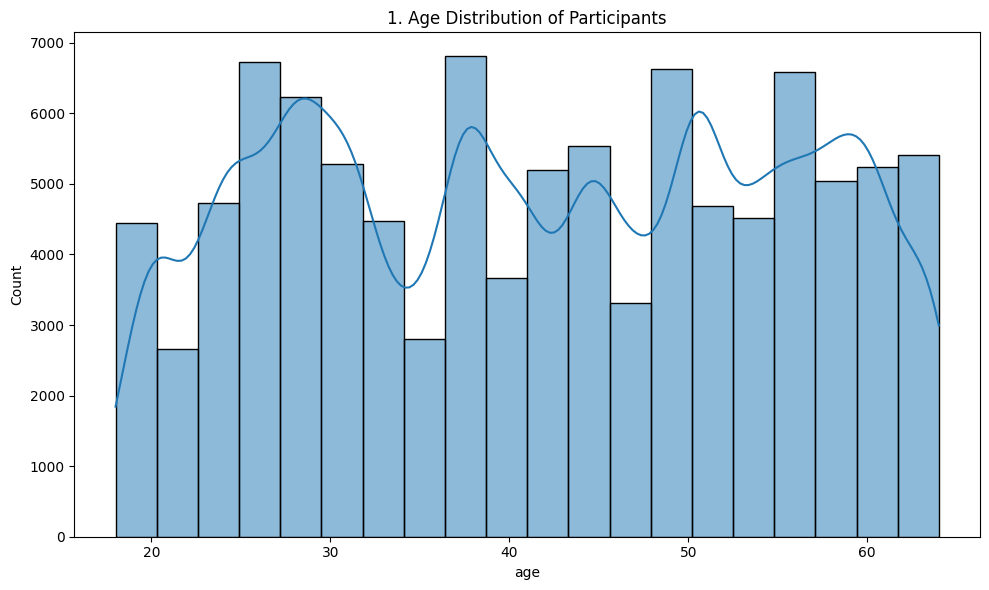

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title(f'{plot_no}. Age Distribution of Participants')
show_fig()
plot_no += 1


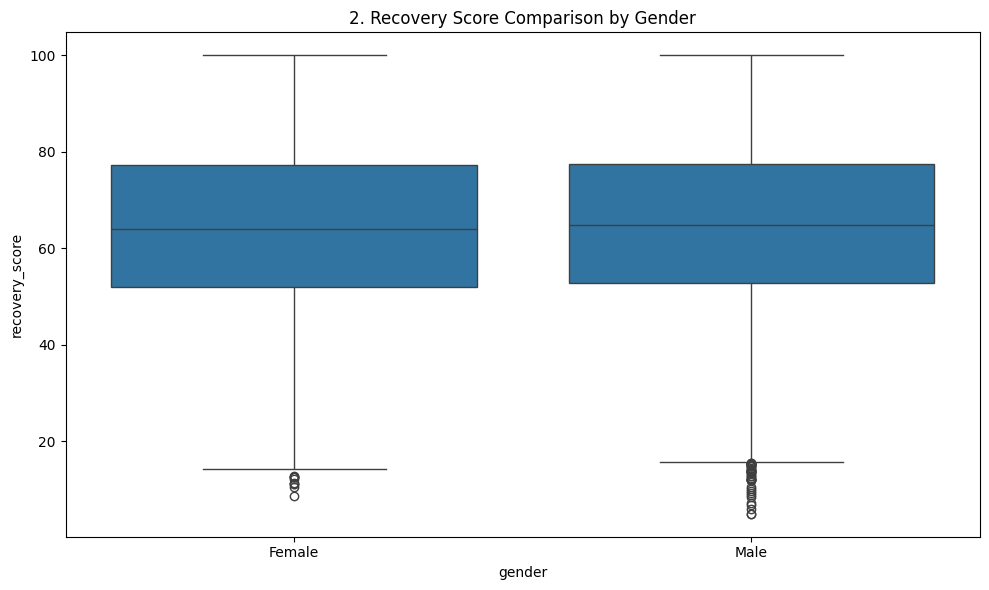

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='recovery_score', data=df)
plt.title(f'{plot_no}. Recovery Score Comparison by Gender')
show_fig()
plot_no += 1


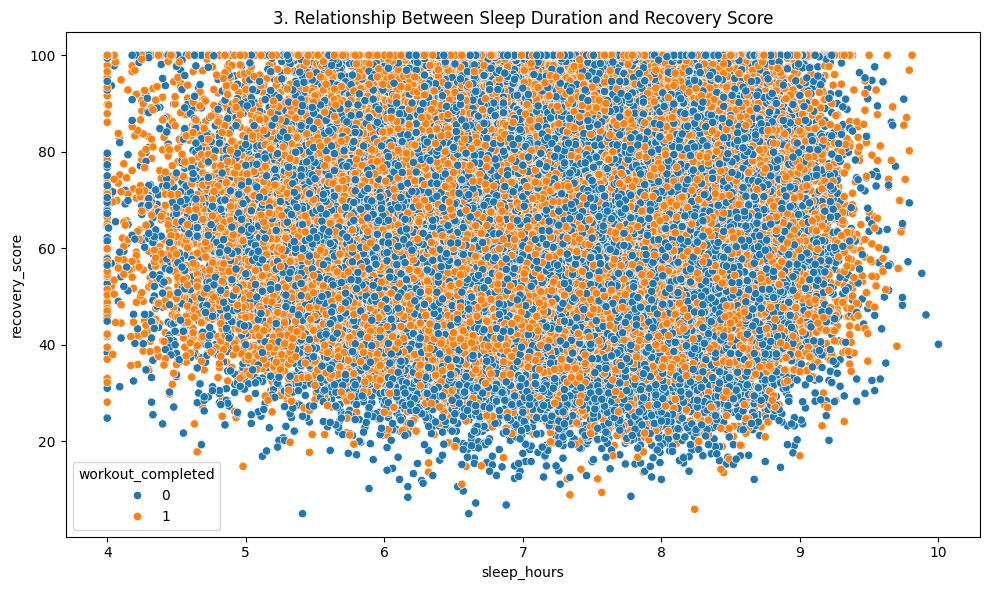

In [16]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='sleep_hours', y='recovery_score', data=df, hue='workout_completed')
plt.title(f'{plot_no}. Relationship Between Sleep Duration and Recovery Score')
show_fig()
plot_no += 1


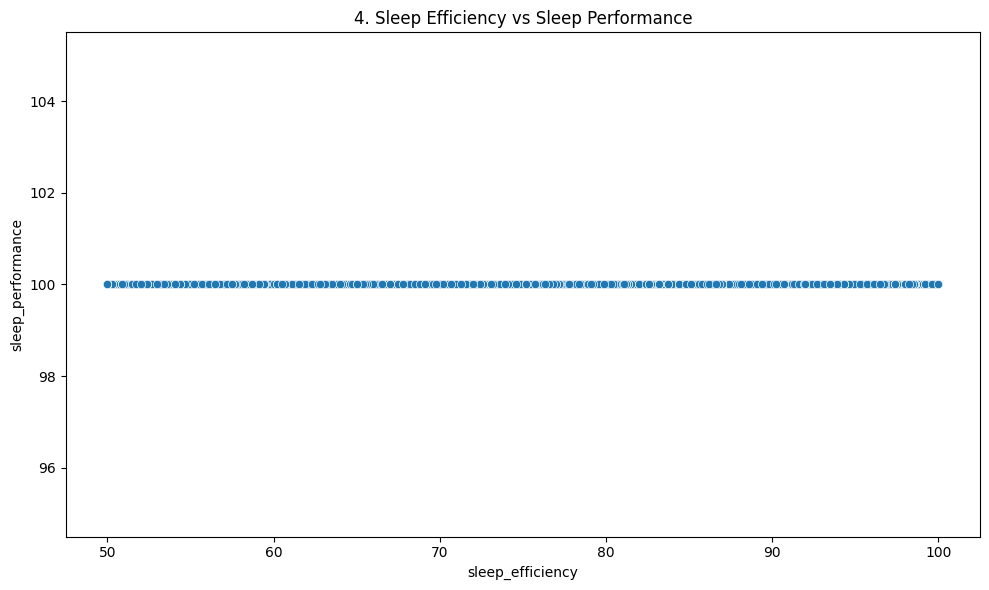

In [17]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='sleep_efficiency', y='sleep_performance', data=df)
plt.title(f'{plot_no}. Sleep Efficiency vs Sleep Performance')
show_fig()
plot_no += 1


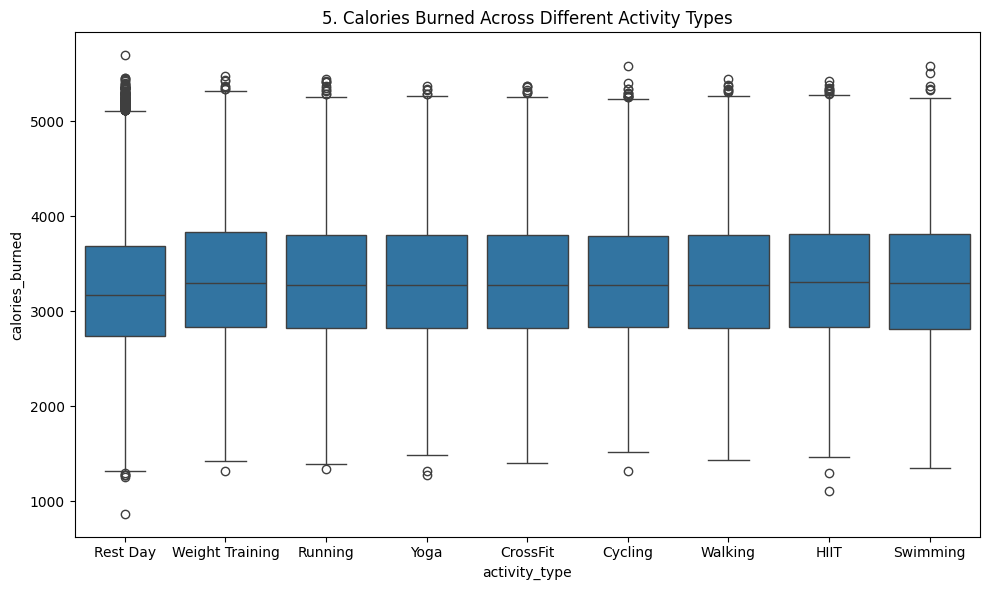

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='activity_type', y='calories_burned', data=df)
plt.title(f'{plot_no}. Calories Burned Across Different Activity Types')
show_fig()
plot_no += 1


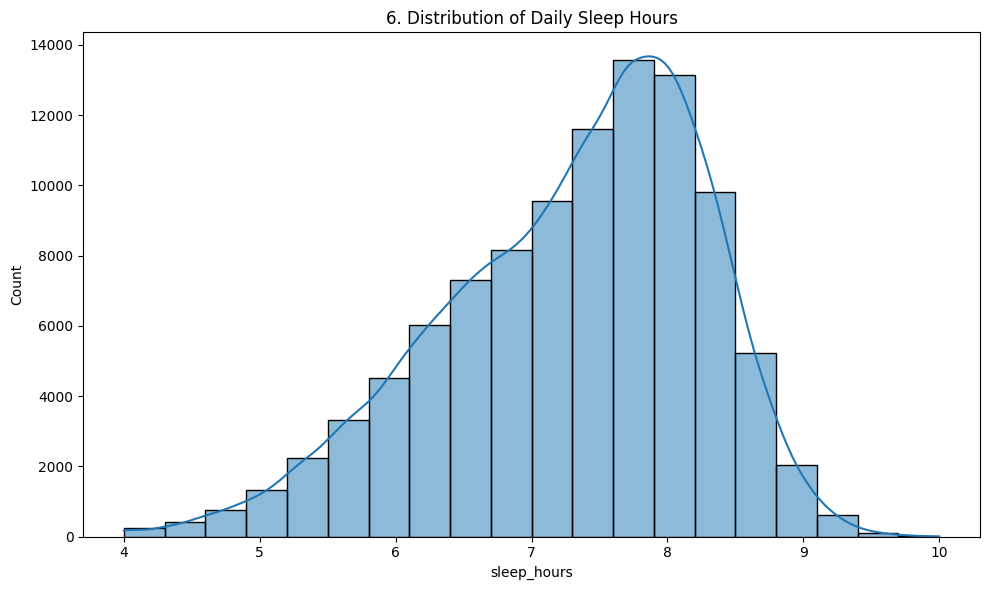

In [19]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['sleep_hours'], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Daily Sleep Hours')
show_fig()
plot_no += 1


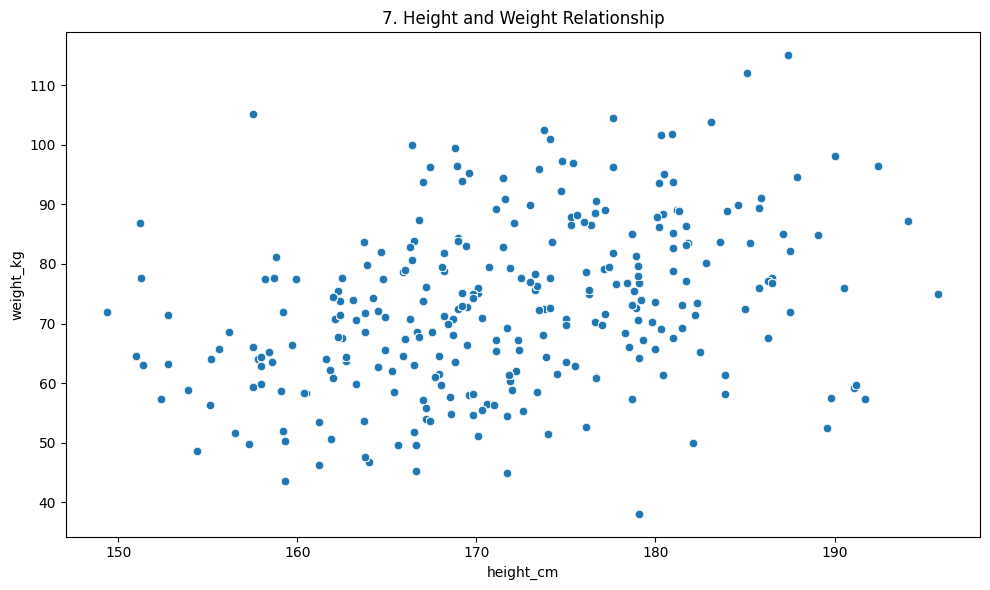

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df)
plt.title(f'{plot_no}. Height and Weight Relationship')
show_fig()
plot_no += 1


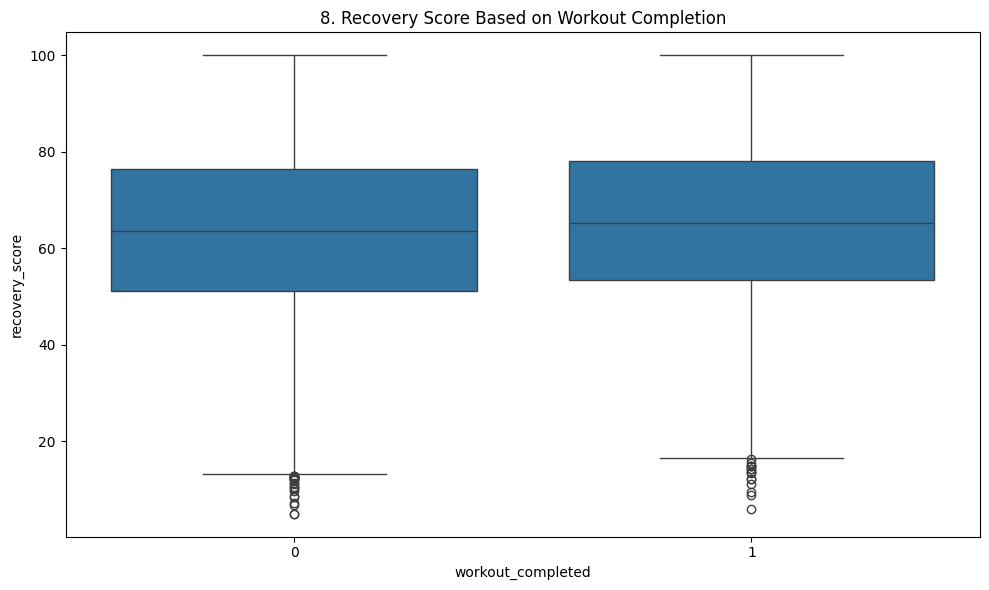

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='workout_completed', y='recovery_score', data=df)
plt.title(f'{plot_no}. Recovery Score Based on Workout Completion')
show_fig()
plot_no += 1


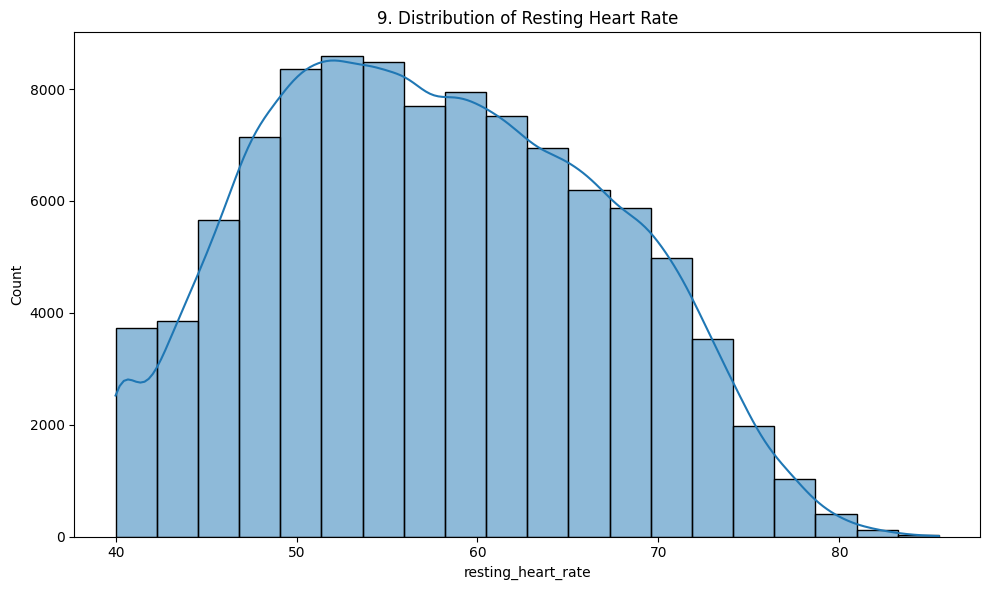

In [22]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['resting_heart_rate'], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Resting Heart Rate')
show_fig()
plot_no += 1


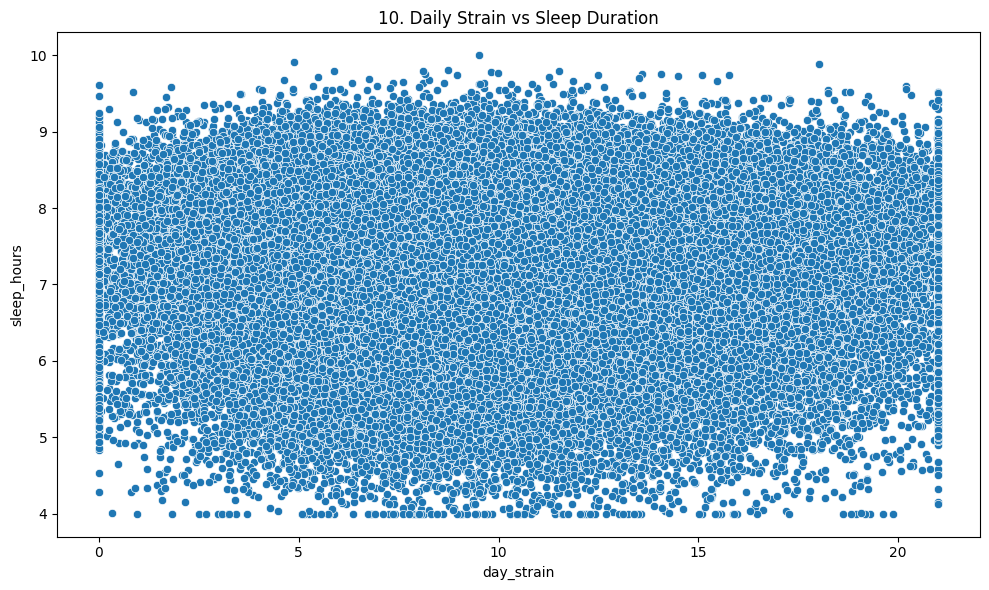

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='day_strain', y='sleep_hours', data=df)
plt.title(f'{plot_no}. Daily Strain vs Sleep Duration')
show_fig()
plot_no += 1


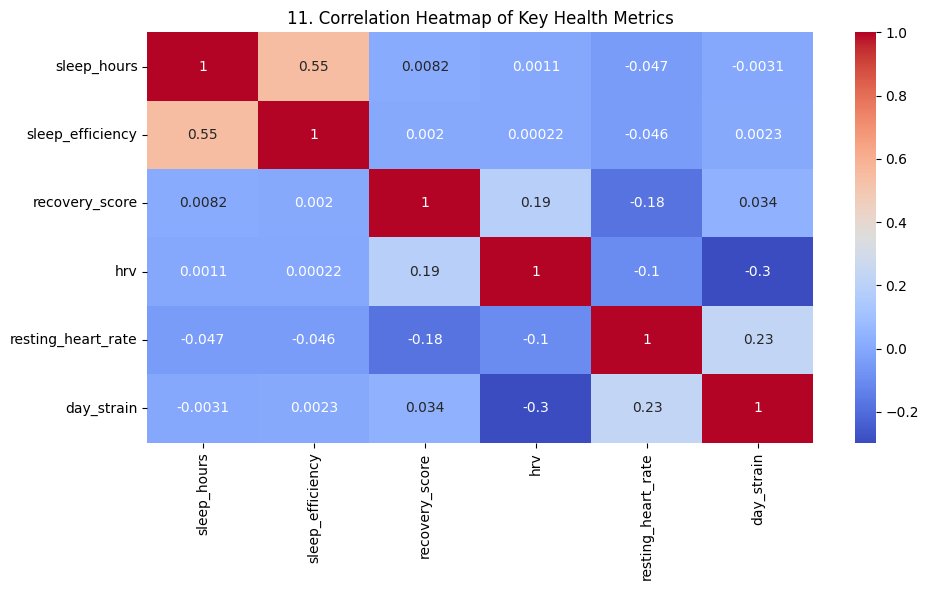

In [24]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['sleep_hours','sleep_efficiency','recovery_score','hrv','resting_heart_rate','day_strain']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Heatmap of Key Health Metrics')
show_fig()
plot_no += 1


# Model Training

## Prepare features and target

In [25]:
X = df.drop(columns=['workout_completed', 'activity_type', 'gender'])
y = df['workout_completed']

## Train-test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Train Gradient Boosting model

In [27]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200)

## Predictions

In [28]:
y_pred = model.predict(X_test)

## Accuracy

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.6328


## Confusion matrix

<Figure size 1000x600 with 0 Axes>

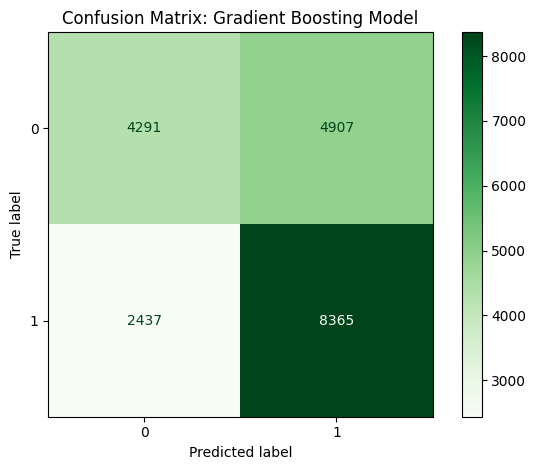

In [30]:
fig = plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Greens')
plt.title('Confusion Matrix: Gradient Boosting Model')
plt.tight_layout()
plt.show()